# Data Analysis

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [287]:
tokyo_data = pd.read_csv('../data/TOKYO_DAILY_CLIMATE_BEST_Jan14May24.csv')

tokyo_data['Date'] = pd.to_datetime(tokyo_data['DATE'], format='%Y-%m-%d')
tokyo_data = tokyo_data.set_index('Date')

tokyo_data.head()


,WMO,WBAN,ICAO,SRC_ID,CITY,LAT,LONG,ALT,DATE,TAVG24_DATATYPE,TAVG24
Date,,,,,,,,,,,
2014-01-01,47662.0,NaN,RJTD,JPN_47662,TOKYO,35.692,139.751,36.0,2014-01-01,15,9.6
2014-01-02,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-02,15,7.3
2014-01-03,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-03,15,5.9
2014-01-04,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-04,15,6.5
2014-01-05,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-05,15,5.4


In [288]:
tokyo_data.tail()

,WMO,WBAN,ICAO,SRC_ID,CITY,LAT,LONG,ALT,DATE,TAVG24_DATATYPE,TAVG24
Date,,,,,,,,,,,
2024-05-27,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-27,15,22.3
2024-05-28,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-28,15,24.0
2024-05-29,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-29,15,22.0
2024-05-30,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-30,15,22.5
2024-05-31,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-31,15,19.0


In [289]:
tokyo_data.describe()

,WMO,WBAN,LAT,LONG,ALT,TAVG24_DATATYPE,TAVG24
count,1.0,0.0,1.000,1.000,1.0,3804.0,3804.000000
mean,47662.0,NaN,35.692,139.751,36.0,15.0,16.444269
std,NaN,NaN,NaN,NaN,NaN,0.0,7.873254
min,47662.0,NaN,35.692,139.751,36.0,15.0,-0.300000
25%,47662.0,NaN,35.692,139.751,36.0,15.0,9.200000
50%,47662.0,NaN,35.692,139.751,36.0,15.0,16.700000
75%,47662.0,NaN,35.692,139.751,36.0,15.0,22.800000
max,47662.0,NaN,35.692,139.751,36.0,15.0,32.200000


In [290]:
tokyo_data = tokyo_data.drop(columns = ['WMO', 'WBAN', 'SRC_ID', 'ALT', 'LAT', 'LONG', 'TAVG24_DATATYPE', 'DATE'])

Text(0.5, 1.0, 'Daily Average Temperature in Tokyo')

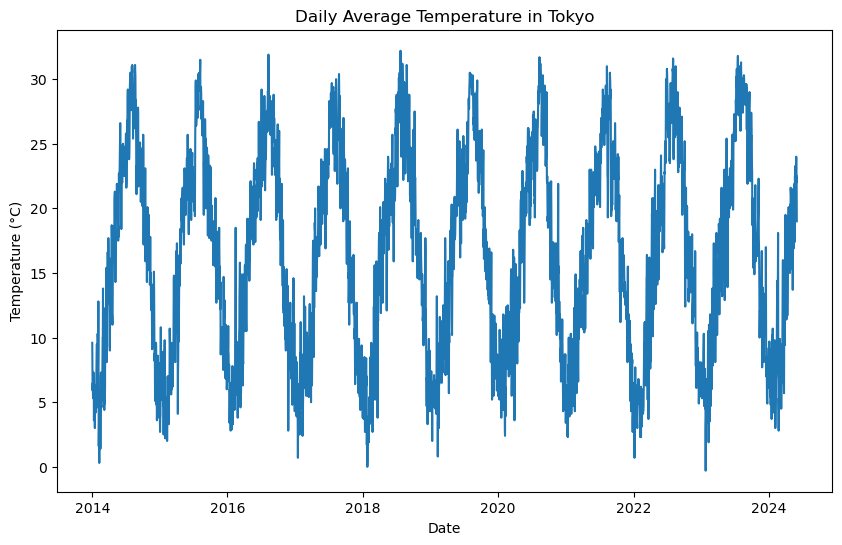

In [291]:
plt.figure(figsize=(10, 6))
plt.plot(tokyo_data.index, tokyo_data['TAVG24'], label='TAVG24 over time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature in Tokyo')


In [292]:
# import os
# import glob

# folder_path = '../data/'

# files = glob.glob(os.path.join(folder_path, '*'))

# for file in files:
#     print(f'{file}')

In [293]:
cities = {
    'Amsterdam': '../data/AMSTERDAM SCHIPHOL_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Atlanta': '../data/Atlanta-Hartsfield International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Boston': '../data/Boston-Logan International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Burbank': '../data/Burbank-Glendale-Pasadena Airport _DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Chicago': '../data/Chicago OHare International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Cincinnati': '../data/Cincinnati-Northern Kentucky International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Dallas': '../data/Dallas-Fort Worth International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Essen': '../data/ESSEN_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Houston': '../data/Houston-George Bush Intercontinental Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Las Vegas': '../data/Las Vegas Mccarran Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'London': '../data/LONDON HEATHROW_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Minneapolis': '../data/Minneapolis-Saint Paul International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'New York': '../data/New York LaGuardia Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Paris': '../data/PARIS ORLY_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Philadelphia': '../data/Philadelphia International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Portland': '../data/Portland International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Sacramento': '../data/Sacramento Executive Airport_DAILY_CLIMATE_BEST_Jan14May24.csv'
    
}

t_max = pd.DataFrame()
t_min = pd.DataFrame()
t_avg = pd.DataFrame()

for city, file in cities.items():
    data = pd.read_csv(file)
    data['Date'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
    data = data.set_index('Date')
    
    t_max[city] = data[['DAILY_MAX_TEMP']]
    t_min[city] = data[['DAILY_MIN_TEMP']]
    t_avg[city] = (t_max[city] + t_min[city])/2
    

t_avg['Tokyo'] = tokyo_data[['TAVG24']]
t_avg.head()

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Date,,,,,,,,,,,,,,,,,,
2014-01-01,6.55,41.0,24.0,60.5,16.0,35.0,50.0,6.45,55.5,53.0,8.5,-3.5,29.0,8.45,32.0,39.0,46.5,9.6
2014-01-02,7.75,39.0,14.0,67.0,10.0,25.0,34.0,7.85,48.0,53.0,8.6,-3.0,25.0,9.75,28.5,40.5,50.5,7.3
2014-01-03,8.50,28.5,8.0,62.5,4.0,10.5,38.5,8.60,42.5,51.0,8.6,9.5,14.5,11.10,16.5,39.0,50.0,5.9
2014-01-04,7.45,30.0,14.5,60.0,25.0,25.0,55.5,8.00,50.5,51.5,7.4,16.5,18.5,9.95,18.5,34.0,51.0,6.5
2014-01-05,5.15,43.0,31.0,62.0,13.0,36.0,35.5,6.40,50.0,46.0,6.6,-11.0,37.5,7.50,35.5,37.0,48.5,5.4


Text(0, 0.5, 'Temperature (°C)')

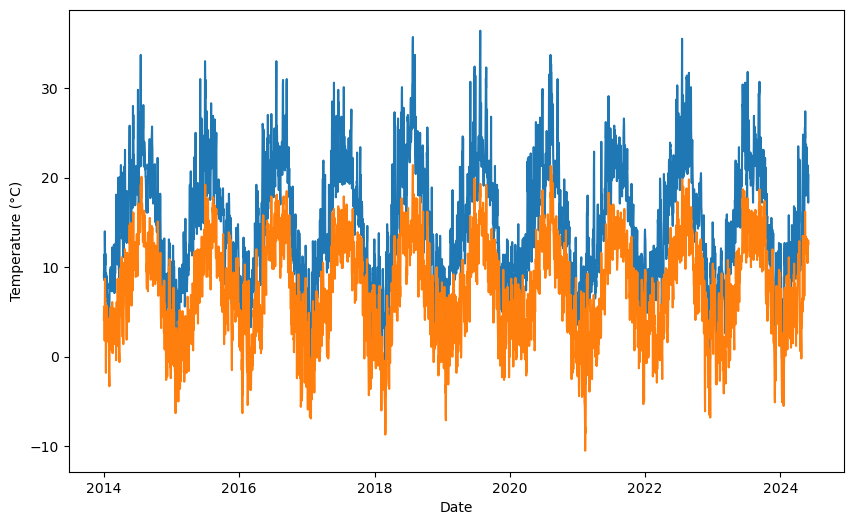

In [294]:
plt.figure(figsize=(10, 6))
plt.plot(t_max.index, t_max['Amsterdam'], label='Amsterdam')
plt.plot(t_min.index, t_min['Amsterdam'], label='Amsterdam')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

Text(0, 0.5, 'Temperature (°C)')

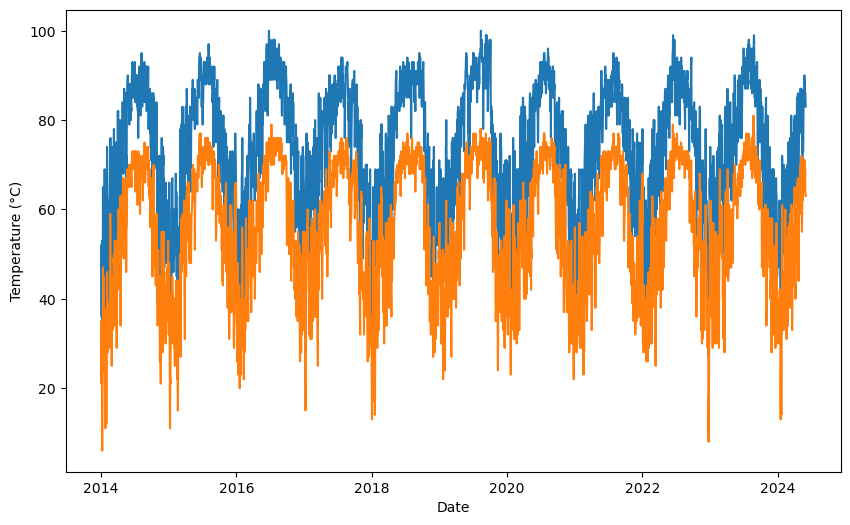

In [295]:
plt.figure(figsize=(10, 6))
plt.plot(t_max.index, t_max['Atlanta'], label='Atlanta')
plt.plot(t_min.index, t_min['Atlanta'], label='Atlanta')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

In [296]:
correlation = t_avg.corr()
correlation

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Amsterdam,1.000000,0.744674,0.789553,0.664613,0.778784,0.754198,0.752024,0.973108,0.722036,0.793299,0.941890,0.783552,0.794950,0.938696,0.791008,0.774556,0.772974,0.812110
Atlanta,0.744674,1.000000,0.862837,0.604199,0.878280,0.933894,0.858713,0.739625,0.893912,0.777908,0.754837,0.837025,0.893848,0.752719,0.911518,0.749937,0.745874,0.815253
Boston,0.789553,0.862837,1.000000,0.677924,0.870341,0.878949,0.815862,0.772147,0.806387,0.809896,0.796760,0.838464,0.979350,0.785786,0.962412,0.794454,0.781060,0.851493
Burbank,0.664613,0.604199,0.677924,1.000000,0.646286,0.611308,0.646922,0.647441,0.593785,0.843624,0.676287,0.675937,0.679862,0.669607,0.674431,0.794184,0.864757,0.735854
Chicago,0.778784,0.878280,0.870341,0.646286,1.000000,0.950497,0.902561,0.767766,0.870268,0.812051,0.783357,0.953103,0.897503,0.781581,0.894876,0.792848,0.773862,0.847449
Cincinnati,0.754198,0.933894,0.878949,0.611308,0.950497,1.000000,0.893944,0.746229,0.892466,0.781912,0.763178,0.894225,0.911513,0.758898,0.922311,0.762471,0.747410,0.822832
Dallas,0.752024,0.858713,0.815862,0.646922,0.902561,0.893944,1.000000,0.743550,0.942468,0.821201,0.764085,0.887076,0.837343,0.764477,0.838398,0.779693,0.768840,0.826958
Essen,0.973108,0.739625,0.772147,0.647441,0.767766,0.746229,0.743550,1.000000,0.717281,0.783077,0.930999,0.772781,0.777759,0.950863,0.775583,0.765573,0.760923,0.798063
Houston,0.722036,0.893912,0.806387,0.593785,0.870268,0.892466,0.942468,0.717281,1.000000,0.777992,0.736173,0.836057,0.831385,0.740945,0.836127,0.737263,0.735116,0.799448
Las Vegas,0.793299,0.777908,0.809896,0.843624,0.812051,0.781912,0.821201,0.783077,0.777992,1.000000,0.802774,0.844228,0.815984,0.805554,0.817614,0.878821,0.923826,0.861592


## Test Normality of difference of Temperature
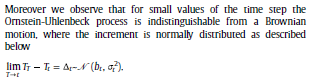



In [297]:
t_change = t_avg.diff()
t_change.dropna(inplace=True)
t_change.head()

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Date,,,,,,,,,,,,,,,,,,
2014-01-02,1.20,-2.0,-10.0,6.5,-6.0,-10.0,-16.0,1.40,-7.5,0.0,0.10,0.5,-4.0,1.30,-3.5,1.5,4.0,-2.3
2014-01-03,0.75,-10.5,-6.0,-4.5,-6.0,-14.5,4.5,0.75,-5.5,-2.0,0.00,12.5,-10.5,1.35,-12.0,-1.5,-0.5,-1.4
2014-01-04,-1.05,1.5,6.5,-2.5,21.0,14.5,17.0,-0.60,8.0,0.5,-1.20,7.0,4.0,-1.15,2.0,-5.0,1.0,0.6
2014-01-05,-2.30,13.0,16.5,2.0,-12.0,11.0,-20.0,-1.60,-0.5,-5.5,-0.80,-27.5,19.0,-2.45,17.0,3.0,-2.5,-1.1
2014-01-06,5.10,-10.5,11.5,0.5,-22.0,-27.5,-11.5,2.00,-18.5,0.0,1.05,-6.5,-1.0,3.05,1.0,0.0,-1.0,-0.1


In [298]:
t_change.describe()

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
count,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3.803000e+03,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000
mean,0.002603,0.008414,0.010912,0.001315,0.012753,0.007757,0.006705,2.169340e-03,0.005128,0.010255,0.001288,0.017749,0.010387,0.001591,0.008940,0.006705,0.008020,0.002472
std,2.077268,4.912149,6.445719,3.349334,6.520385,6.432264,5.945960,2.254903e+00,5.365707,3.811239,1.991935,6.452453,5.888235,2.207829,5.933121,3.856704,3.429304,2.121911
min,-8.500000,-21.000000,-23.500000,-17.000000,-26.500000,-27.500000,-26.500000,-1.010000e+01,-26.000000,-19.500000,-10.200000,-27.500000,-24.500000,-10.200000,-28.000000,-17.500000,-15.500000,-11.900000
25%,-1.250000,-2.000000,-4.000000,-2.000000,-3.500000,-3.500000,-2.500000,-1.350000e+00,-2.000000,-2.000000,-1.250000,-3.500000,-3.500000,-1.400000,-3.500000,-2.500000,-2.000000,-1.200000
50%,-0.050000,0.500000,0.000000,0.000000,0.500000,0.500000,0.500000,8.881784e-16,0.500000,0.500000,0.150000,0.500000,0.500000,0.000000,0.500000,0.000000,0.000000,0.200000
75%,1.275000,3.000000,4.000000,2.000000,4.000000,3.500000,3.500000,1.450000e+00,2.500000,2.500000,1.350000,4.000000,4.000000,1.450000,3.500000,2.500000,2.000000,1.400000
max,8.550000,19.500000,30.500000,15.500000,22.500000,24.000000,23.500000,1.005000e+01,24.500000,12.000000,6.200000,25.000000,21.500000,9.100000,21.500000,15.000000,11.500000,8.000000


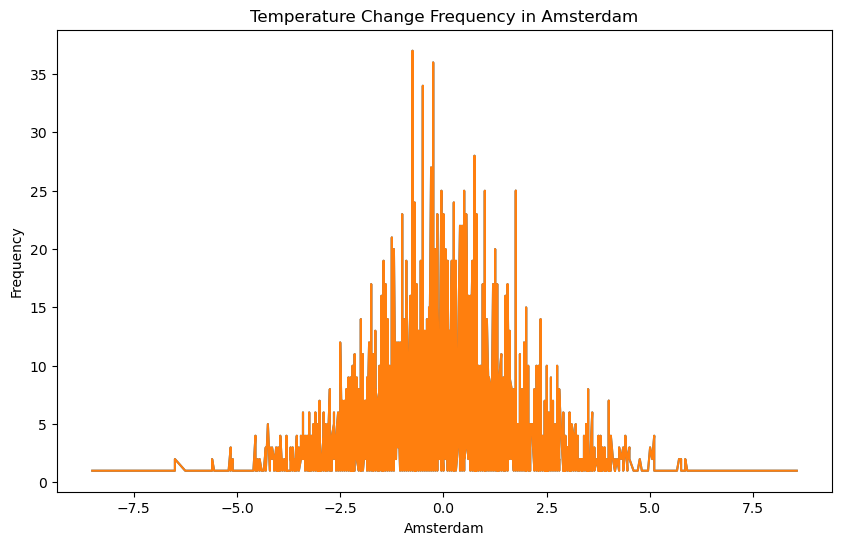

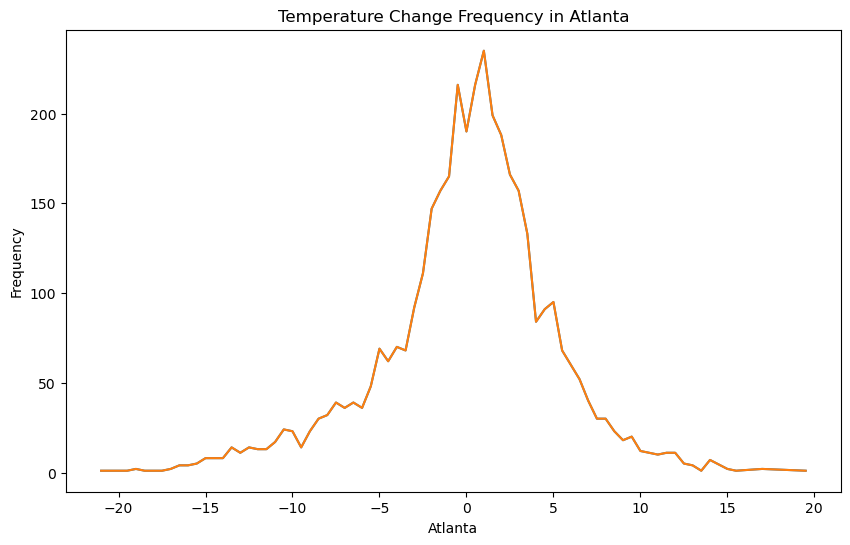

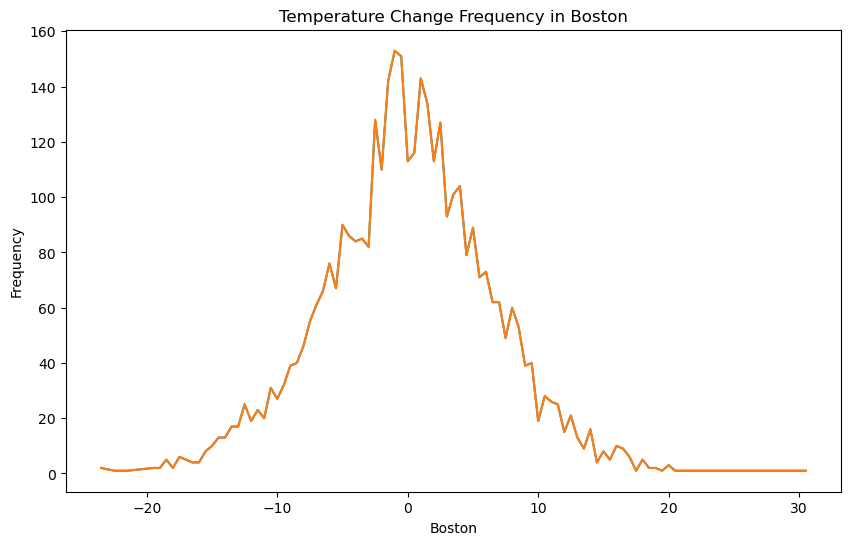

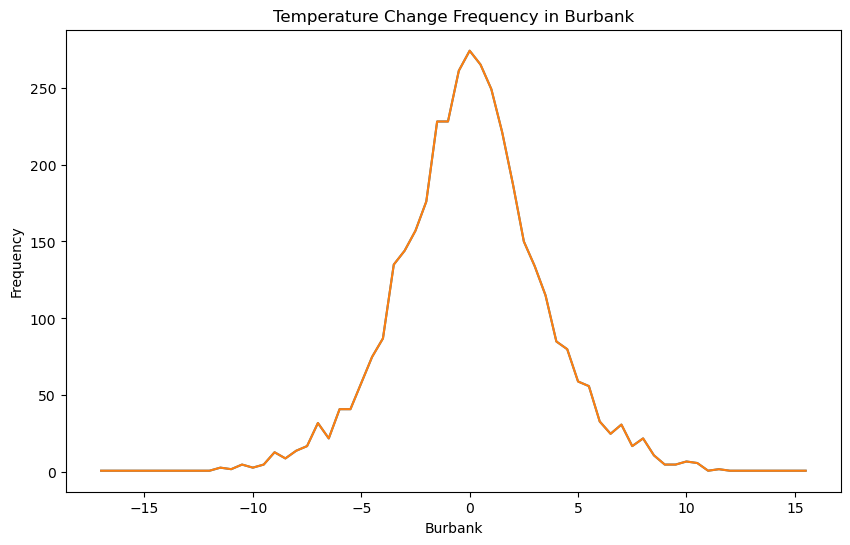

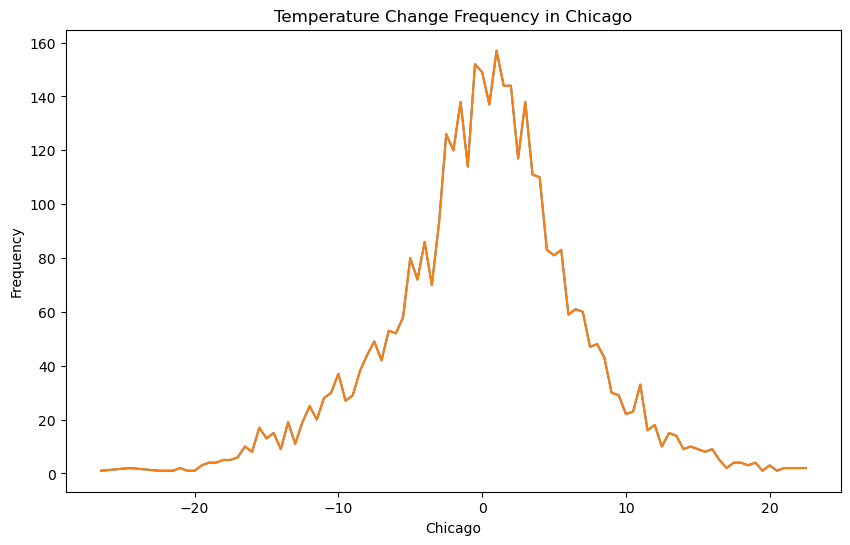

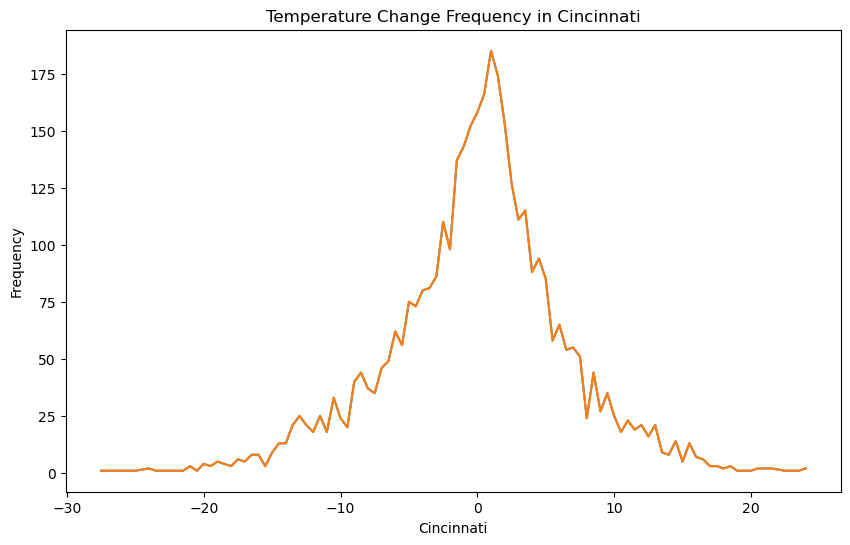

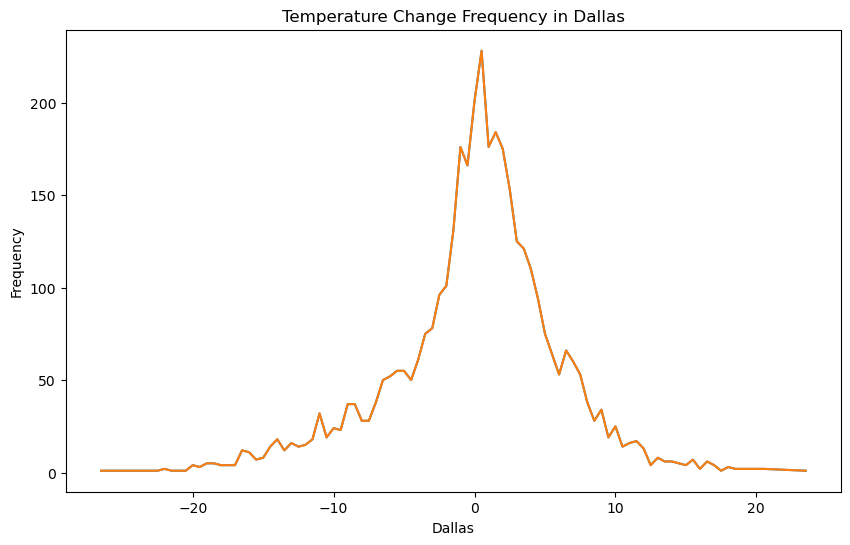

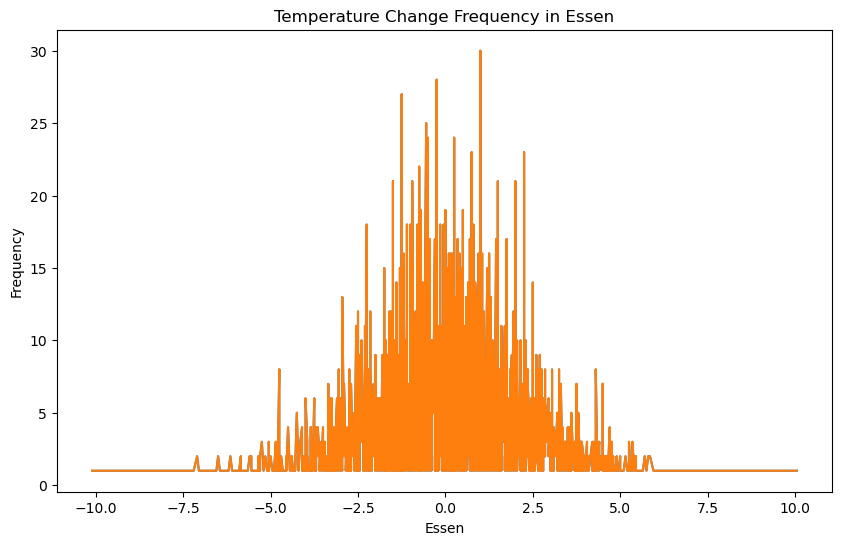

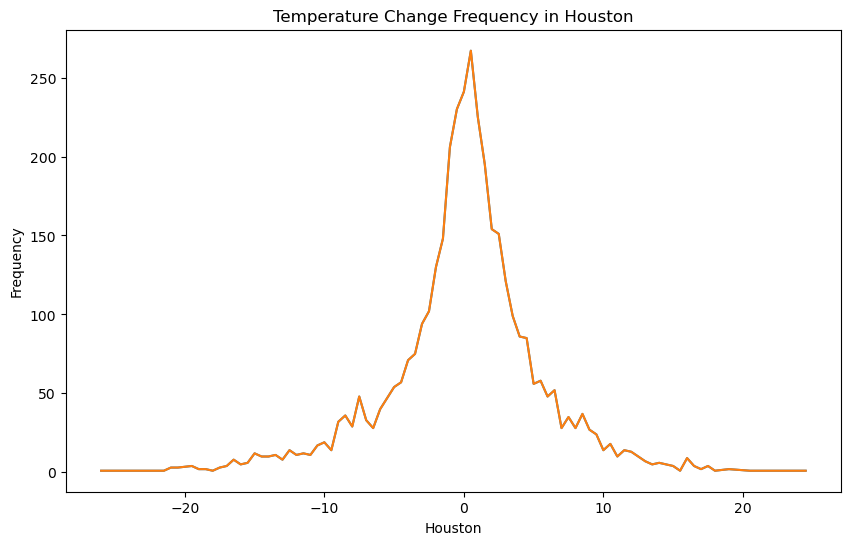

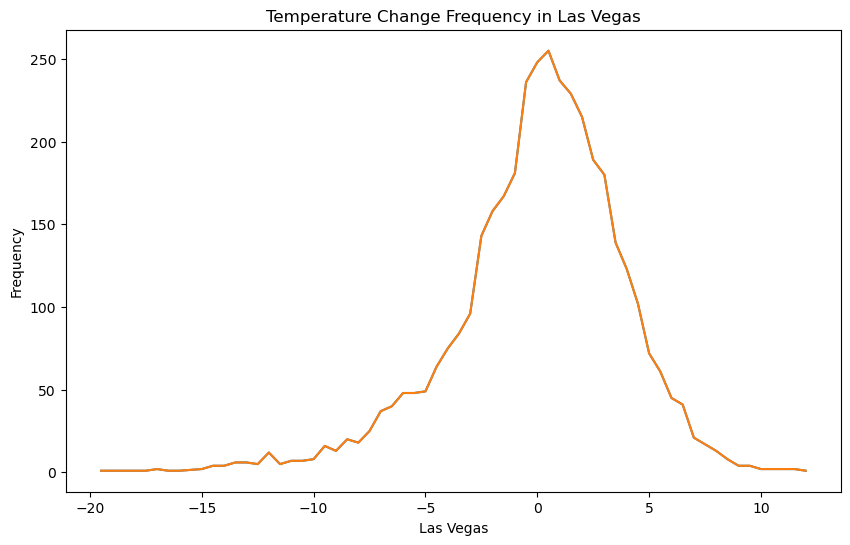

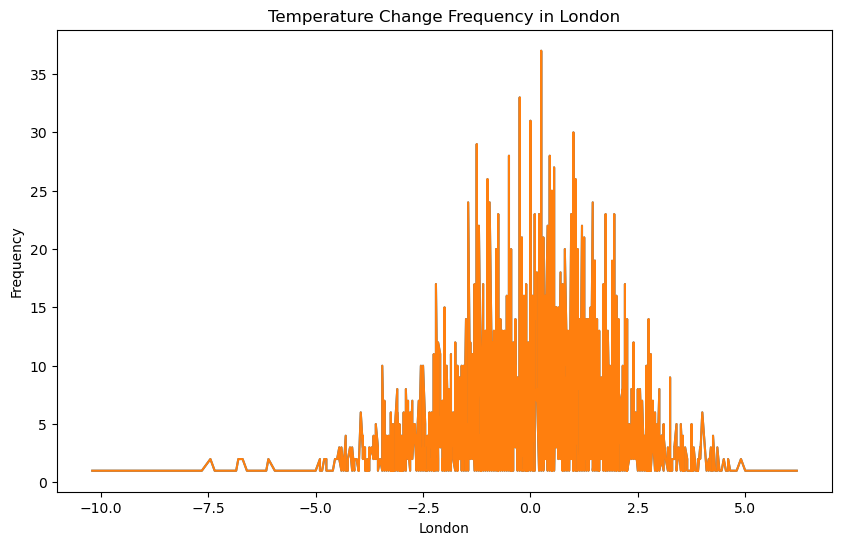

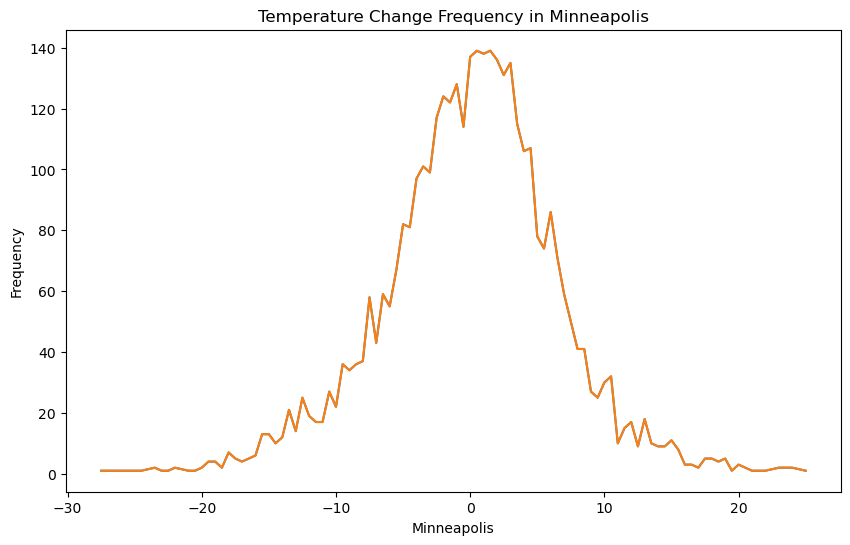

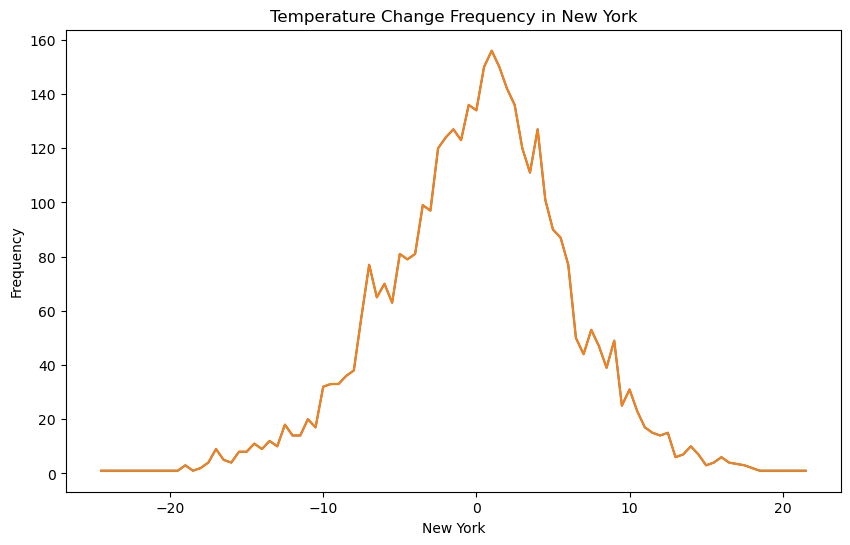

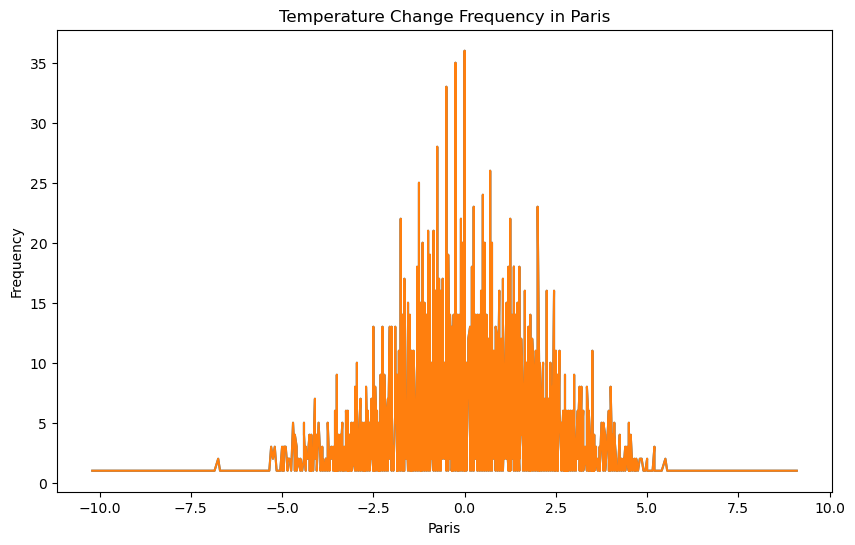

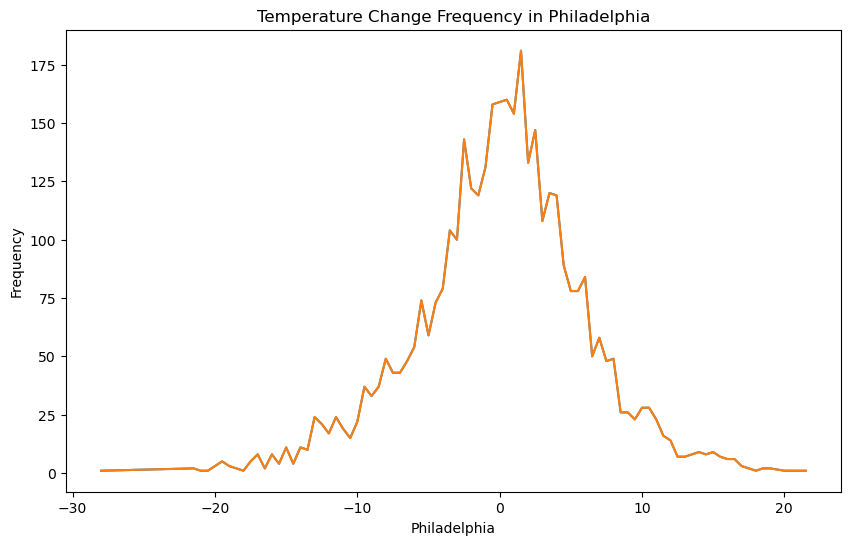

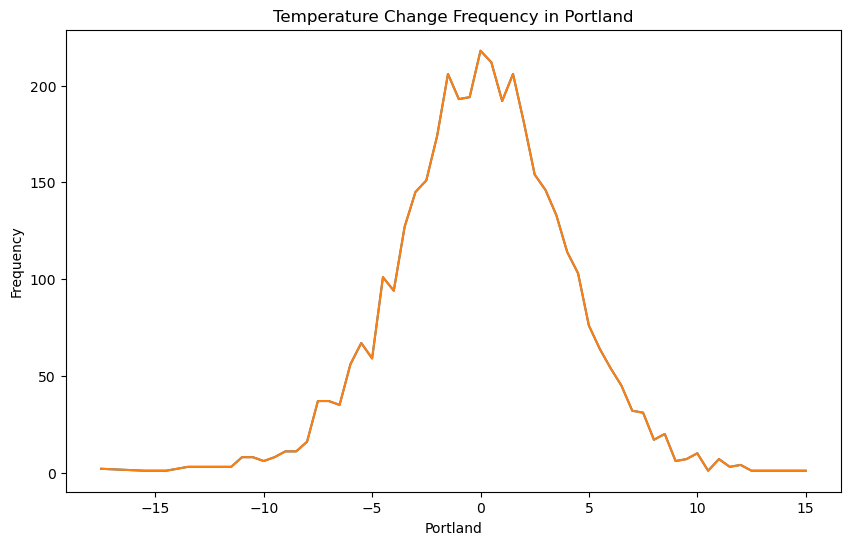

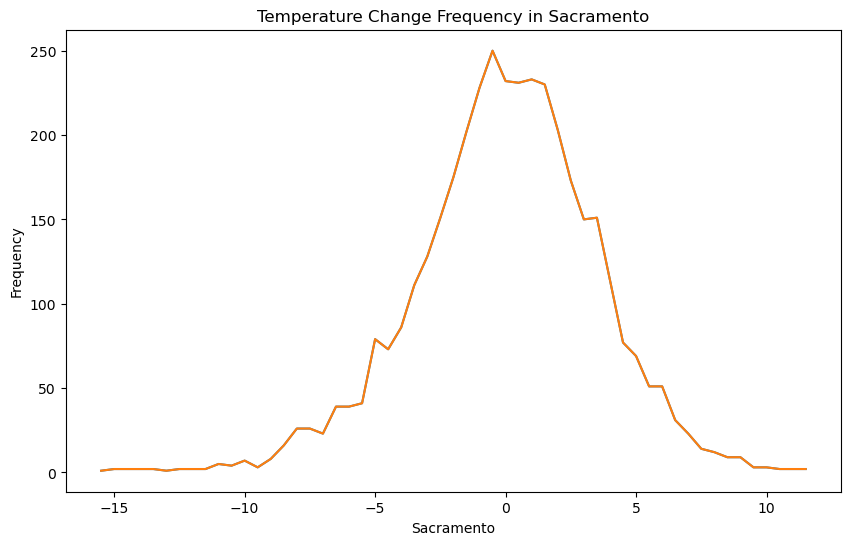

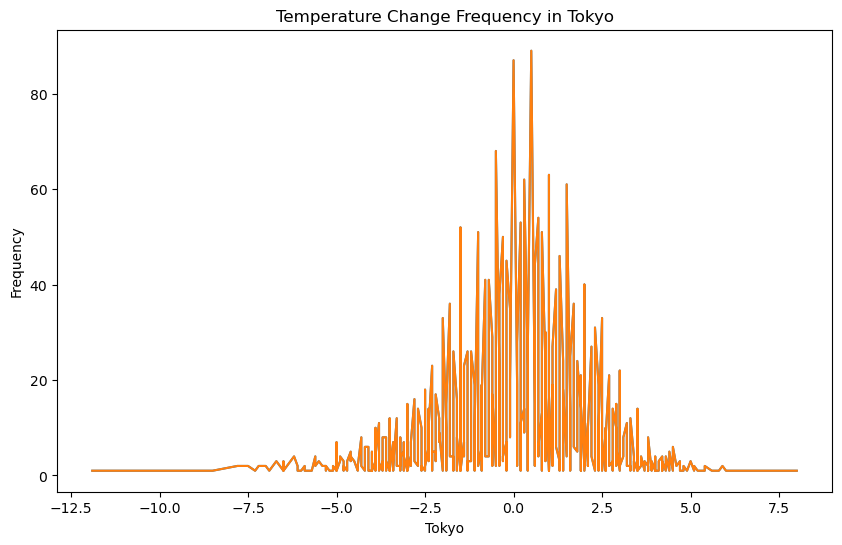

In [299]:
for city in t_change.columns:
    t_change_counts = pd.Series(t_change[city]).value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.plot(t_change_counts.index, t_change_counts.values)
    plt.xlabel('Temperature Change (°C)')
    plt.ylabel('Frequency')
    t_change_counts.plot()
    plt.title(f'Temperature Change Frequency in {city}')

In [300]:
for city in t_change.columns:
    t_statistic, p_value = stats.ttest_1samp(t_change[city], 0)
    print(f'{city}: t-statistic = {t_statistic}, p-value = {p_value}')
    kurtosis_value = stats.kurtosis(t_change[city])
    skewness_value = stats.skew(t_change[city])
    print(f'{city}: Kurtosis = {kurtosis_value}, Skewness = {skewness_value}')
    print('')

Amsterdam: t-statistic = 0.07728219669754983, p-value = 0.9384031200366449
Amsterdam: Kurtosis = 0.7230435495115577, Skewness = 0.056939027552661656

Atlanta: t-statistic = 0.10563682138993404, p-value = 0.9158760816381897
Atlanta: Kurtosis = 1.3119088942621628, Skewness = -0.5244537486980408

Boston: t-statistic = 0.10440314528295283, p-value = 0.9168549336659482
Boston: Kurtosis = 0.40235010292855655, Skewness = -0.012743636213209331

Burbank: t-statistic = 0.024207409800248054, p-value = 0.9806884380643941
Burbank: Kurtosis = 0.9375815478573362, Skewness = -0.012274602399239866

Chicago: t-statistic = 0.12061611414134416, p-value = 0.9040014782109596
Chicago: Kurtosis = 0.7438187630901401, Skewness = -0.15948007115335044

Cincinnati: t-statistic = 0.07436952321329628, p-value = 0.9407202709791779
Cincinnati: Kurtosis = 1.0264952710856967, Skewness = -0.19286729271914563

Dallas: t-statistic = 0.0695432590504352, p-value = 0.9445608574802935
Dallas: Kurtosis = 1.4152034489800789, Ske

In [301]:
change_correlation = t_change.corr()
change_correlation

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Amsterdam,1.000000,0.017060,0.005684,-0.003313,0.008985,0.001659,0.017627,0.737894,0.004969,0.020375,0.502211,0.034753,-0.002271,0.493059,-0.001093,-0.006537,0.020902,0.022835
Atlanta,0.017060,1.000000,0.253155,-0.025807,0.155376,0.452957,0.101786,0.012024,0.347761,-0.136345,-0.000294,-0.070659,0.351811,-0.012086,0.402518,0.023533,-0.050363,-0.007538
Boston,0.005684,0.253155,1.000000,0.003523,-0.050336,0.168321,-0.019614,-0.008797,0.080946,-0.044986,-0.005747,-0.233934,0.812446,-0.017103,0.701500,0.019473,-0.005451,-0.004083
Burbank,-0.003313,-0.025807,0.003523,1.000000,-0.102995,-0.067660,-0.116715,-0.027459,-0.074030,0.258550,0.016509,-0.079921,-0.007716,-0.007046,0.008722,0.152646,0.274591,-0.015259
Chicago,0.008985,0.155376,-0.050336,-0.102995,1.000000,0.581056,0.409268,0.030583,0.326251,-0.042852,-0.017631,0.488135,0.005931,0.017248,-0.032049,-0.003379,-0.044729,0.026186
Cincinnati,0.001659,0.452957,0.168321,-0.067660,0.581056,1.000000,0.371805,0.014804,0.454860,-0.116834,-0.005071,0.141041,0.285093,0.010567,0.296274,0.018751,-0.050050,0.009962
Dallas,0.017627,0.101786,-0.019614,-0.116715,0.409268,0.371805,1.000000,0.025003,0.598987,0.004526,0.023112,0.271176,0.007432,0.041034,-0.033092,-0.059590,-0.068371,0.021503
Essen,0.737894,0.012024,-0.008797,-0.027459,0.030583,0.014804,0.025003,1.000000,0.005234,-0.002151,0.452470,0.021188,-0.021276,0.556049,-0.023630,0.004483,-0.005516,0.021731
Houston,0.004969,0.347761,0.080946,-0.074030,0.326251,0.454860,0.598987,0.005234,1.000000,-0.068439,0.016141,0.080253,0.140309,0.022844,0.113975,-0.045290,-0.075804,0.003932
Las Vegas,0.020375,-0.136345,-0.044986,0.258550,-0.042852,-0.116834,0.004526,-0.002151,-0.068439,1.000000,0.029106,0.021905,-0.071132,0.010251,-0.070489,0.022237,0.195972,-0.001782
